In [1]:
from utils import *
from models import *


import os
os.chdir('../..')
print(os.getcwd())


/Users/joyqiu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


using device:  cpu
using device:  cpu
/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns


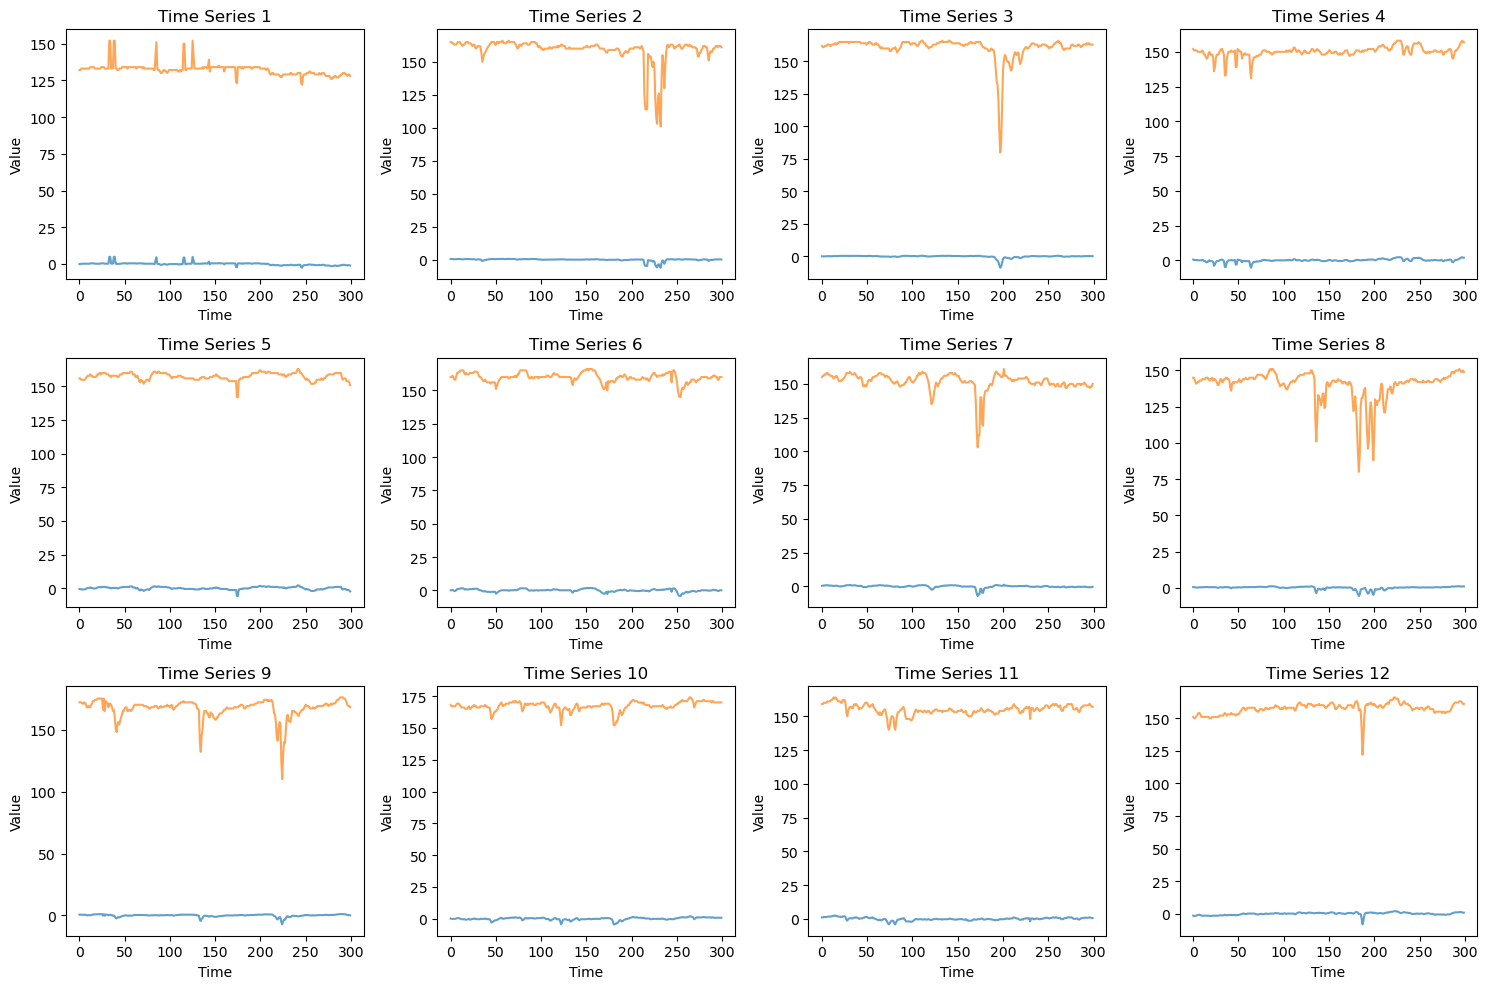

In [2]:
data_path = './data/PAS Challenge HR Data.xlsx'  
batch_size = 128
train_dataloader, test_dataloader, df_scaled, df = prepare_data(data_path, batch_size=batch_size)

In [8]:
overwrite = True
model_path = './script/VAE/results/hr_vae_linear_small.pth' 
loss_path = './script/VAE/results/hr_train_test_losses_linear_small.pth'
# Initialize model
model = VAE_Linear_Small().to(device)
nn_summary(model, 
        input_size=(batch_size, 300),
        col_names=["input_size", "output_size", "num_params", "kernel_size"],
        depth=4)


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape
VAE_Linear_Small                         [128, 300]                [128, 300]                --                        --
├─Sequential: 1-1                        [128, 300]                [128, 50]                 --                        --
│    └─Linear: 2-1                       [128, 300]                [128, 150]                45,150                    --
│    └─LeakyReLU: 2-2                    [128, 150]                [128, 150]                --                        --
│    └─Linear: 2-3                       [128, 150]                [128, 150]                22,650                    --
│    └─LeakyReLU: 2-4                    [128, 150]                [128, 150]                --                        --
│    └─Linear: 2-5                       [128, 150]                [128, 50]                 7,550                     --
│    └─LeakyRe

In [9]:
if not os.path.exists(model_path) or overwrite:
    # Train the model
    num_epochs = 10000000000000
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_losses = train(
        model=model,
        train_dataloader=train_dataloader,
        test_dataloader=test_dataloader,
        optimizer=optimizer,
        num_epochs=num_epochs,
        device=device
    )
    # Save model locally
    torch.save(model.state_dict(), model_path)
    torch.save((train_losses, test_losses), loss_path)
else:
    # load model from model_path
    model.load_state_dict(torch.load(model_path))
    model.eval()
    train_losses, test_losses = torch.load(loss_path)



Epoch [1/10000000000000]
	Training Loss: 1.012663
	Testing Loss: 1.001191
	Learning Rate: 0.001000000
Epoch [2/10000000000000]
	Training Loss: 1.000452
	Testing Loss: 1.000443
	Learning Rate: 0.001000000
Epoch [3/10000000000000]
	Training Loss: 0.999974
	Testing Loss: 1.000022
	Learning Rate: 0.001000000
Epoch [4/10000000000000]
	Training Loss: 0.999766
	Testing Loss: 0.999935
	Learning Rate: 0.001000000
Epoch [5/10000000000000]
	Training Loss: 0.999672
	Testing Loss: 0.999752
	Learning Rate: 0.001000000
Epoch [6/10000000000000]
	Training Loss: 0.999648
	Testing Loss: 0.999991
	Learning Rate: 0.001000000
Epoch [7/10000000000000]
	Training Loss: 0.999616
	Testing Loss: 0.999779
	Learning Rate: 0.001000000
Epoch [8/10000000000000]
	Training Loss: 0.999629
	Testing Loss: 0.999737
	Learning Rate: 0.001000000
Epoch [9/10000000000000]
	Training Loss: 0.999627
	Testing Loss: 0.999800
	Learning Rate: 0.001000000
Epoch [10/10000000000000]
	Training Loss: 0.999606
	Testing Loss: 0.999738
	Learni

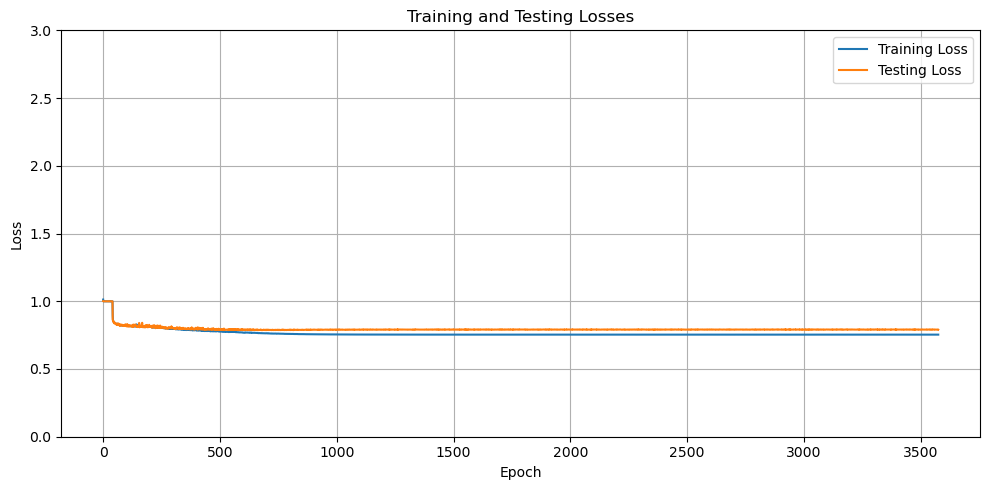

In [10]:

# Plot training and testing losses
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

# Plot losses
ax1.plot(train_losses, label='Training Loss')
ax1.plot(test_losses, label='Testing Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
#ylim 0 - 1
ax1.set_ylim(0, 3)
ax1.set_title('Training and Testing Losses')
ax1.legend()
ax1.grid(True)


plt.tight_layout()
plt.show()